# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [26]:
!python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


In [27]:
def chebyshev_nodes(n: int = 10) -> np.ndarray | None:
    if not isinstance(n,int) or n <= 0:
        return None
    return np.cos(np.pi * np.arange(n) / (n - 1))

def bar_cheb_weights(n: int = 10) -> np.ndarray | None:
    if not isinstance(n,int) or n<= 0:
        return None
    w = np.ones(n) 
    w[0] = 0.5
    w[-1] = (-1)**(n-1) * 0.5
    w[1:-1:2] = -1
    return w

---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [ ]:
def func1(x):
    return np.sign(x) * x + x**2

def func2(x):
    return np.sqn(x) * x**2

def func3(x):
    return abs(np.sgn(5*x)) ** 3

def func4(x,a):
    return 1/(1 + a * x**2)

def func5(x):
    return np.sign(x)


---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


In [29]:
def L_inf(
    xr: int | float | list | np.ndarray, x: int | float | list | np.ndarray
) -> float | None:
    """Funkcja obliczająca normę L-nieskończoność. Powinna działać zarówno na 
    wartościach skalarnych, listach, jak i wektorach biblioteki numpy.

    Args:
        xr (int | float | list | np.ndarray): Wartość dokładna w postaci 
            skalara, listy lub wektora (n,).
        x (int | float | list | np.ndarray): Wartość przybliżona w postaci 
            skalara, listy lub wektora (n,).

    Returns:
        (float): Wartość normy L-nieskończoność.
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """
    try:
        xr_arr = np.asarray(xr)
        x_arr = np.asarray(x)
        if xr_arr.shape != x_arr.shape:
            return None
        return np.max(np.abs(xr_arr - x_arr))
    except:
        return None

---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


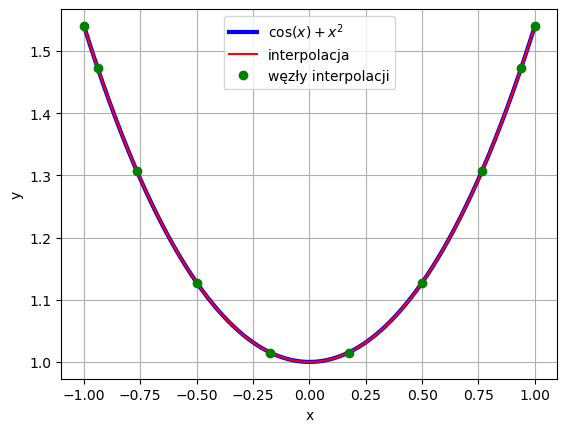

In [30]:

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)

# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

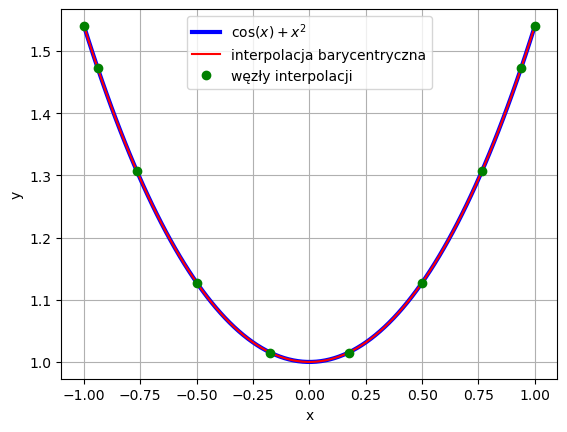

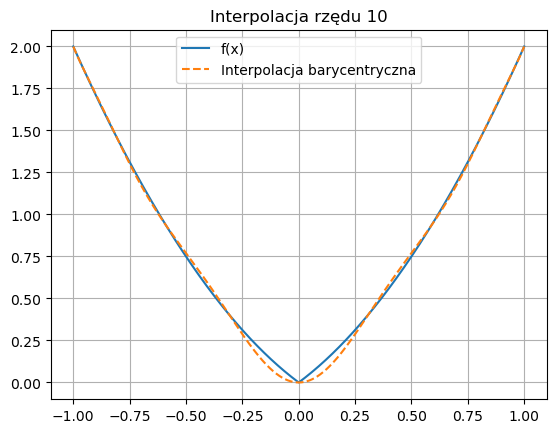

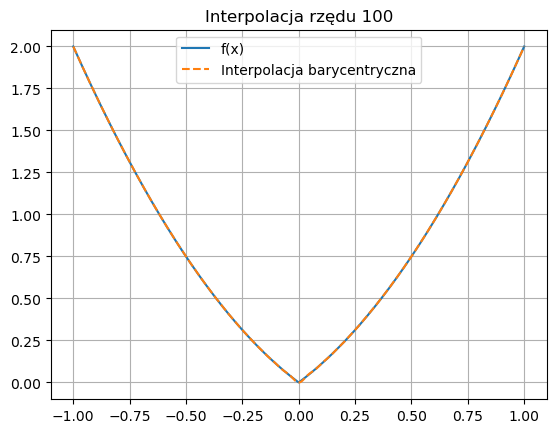

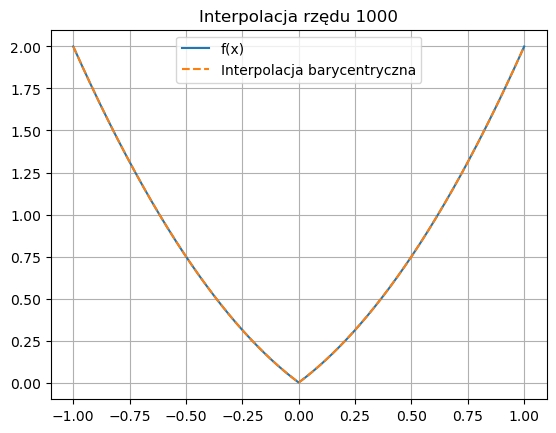

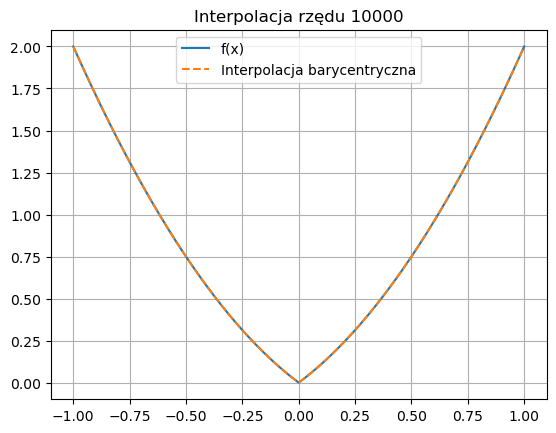

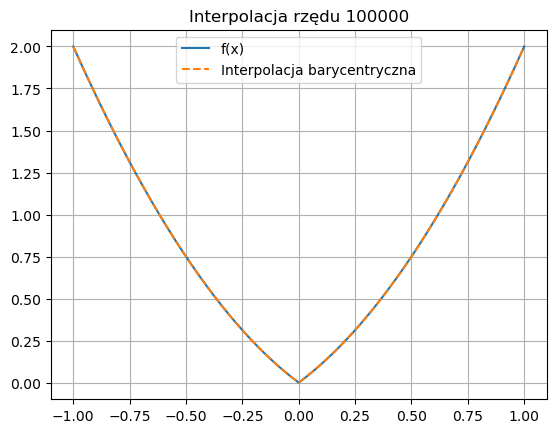

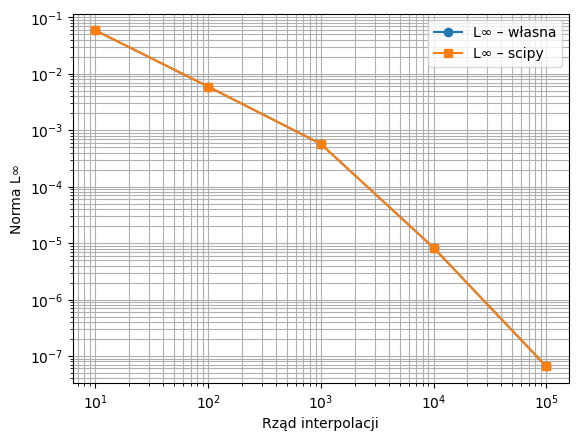

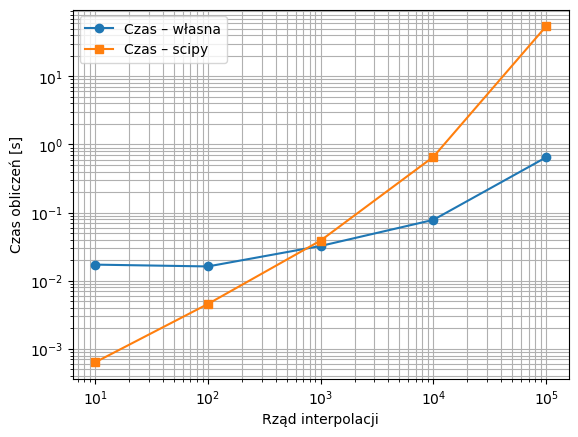

In [ ]:
# ===== Twoja implementacja tutaj =====
import time
import scipy.interpolate

# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa
def barycentric_inte(
xi: np.ndarray, yi: np.ndarray, wi: np.ndarray, x: np.ndarray
) -> np.ndarray | None:

    """Funkcja wykonująca interpolację barycentryczną.

    Args:
        xi (np.ndarray): Węzły interpolacji (n,).
        yi (np.ndarray): Wartości funkcji w węzłach (n,).
        wi (np.ndarray): Wagi barycentryczne (n,).
        x (np.ndarray): Punkty, w których ma być obliczona wartość 
            interpolowanego wielomianu (m,).

    Returns:
        np.ndarray: Wartości interpolowanego wielomianu w punktach x (m,).
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """
    if not all(isinstance(arr, np.ndarray) for arr in (xi, yi, wi, x)):
        return None
    if not (xi.ndim == yi.ndim == wi.ndim == 1):
        return None
    if xi.ndim != 1 or yi.ndim != 1 or wi.ndim != 1 or x.ndim != 1:
        return None
    if xi.size == 0 or x.size == 0:
        return None
    P = np.empty_like(x, dtype=float) #tablica wynikowa
    
    for j,xj in enumerate(x):
        diff = xj - xi
        idx = np.where(diff == 0)[0]
        if idx.size > 0:
            P[j] = yi[idx[0]]
            continue
        numerator = np.sum(wi * yi / diff)
        denominator = np.sum(wi / diff)
        P[j] = numerator / denominator
    return P

n = 10
xi = chebyshev_nodes(n)
yi = f(xi)
wi = bar_cheb_weights(n)
x = np.linspace(-1, 1, 100)
P = barycentric_inte(xi, yi, wi, x)
plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, P, 'r', label='interpolacja barycentryczna')
plt.plot(xi, yi, 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

def func1(x):
    return np.sign(x) * x + x**2

n_values = [1, 2, 3, 4, 5]
x_plot = np.linspace(-1, 1, 1000)

errors_own = []
errors_scipy = []
times_own = []
times_scipy = []
orders = []

for n in n_values:
    N = 10**n
    nodes = N + 1
    orders.append(N)

    xi = chebyshev_nodes(nodes)
    yi = func1(xi)
    wi = bar_cheb_weights(nodes)

    t0 = time.time()
    P_own = barycentric_inte(xi, yi, wi, x_plot)
    t1 = time.time()

    err_own = L_inf(func1(x_plot), P_own)
    errors_own.append(err_own)
    times_own.append(t1 - t0)

    t0 = time.time()
    
    P_scipy = scipy.interpolate.barycentric_interpolate(xi, yi, x_plot)
    t1 = time.time()

    err_scipy = L_inf(func1(x_plot), P_scipy)
    errors_scipy.append(err_scipy)
    times_scipy.append(t1 - t0)

    plt.figure()
    plt.plot(x_plot, func1(x_plot), label="f(x)")
    plt.plot(x_plot, P_own, '--', label="Interpolacja barycentryczna")
    plt.title(f"Interpolacja rzędu {N}")
    plt.legend()
    plt.grid(True)
    plt.show()

plt.figure()
plt.loglog(orders, errors_own, 'o-', label="L∞ – własna")
plt.loglog(orders, errors_scipy, 's-', label="L∞ – scipy")
plt.xlabel("Rząd interpolacji")
plt.ylabel("Norma L∞")
plt.legend()
plt.grid(True, which="both")
plt.show()

plt.figure()
plt.loglog(orders, times_own, 'o-', label="Czas – własna")
plt.loglog(orders, times_scipy, 's-', label="Czas – scipy")
plt.xlabel("Rząd interpolacji")
plt.ylabel("Czas obliczeń [s]")
plt.legend()
plt.grid(True, which="both")
plt.show()


W raz ze wzrostem rzędu interpolacji maleje błąd interpolacji co spadek normy L, ponadto dla wyższego rzędu interpolacji wzrasta czas obliczeń. Z wykresu wynika także, że metoda zaimplementowana przeze mnie jest bardziej optymalna czasowo niż metoda z bilioteki scipy

---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

f2: rząd = 10, błąd = 7.616e-03
f2: rząd = 100, błąd = 7.532e-05
f2: rząd = 1000, błąd = 7.481e-07
f2: rząd = 10000, błąd = 3.652e-10
f2: rząd = 100000, błąd = 3.225e-14
f3: rząd = 10, błąd = 0.000e+00


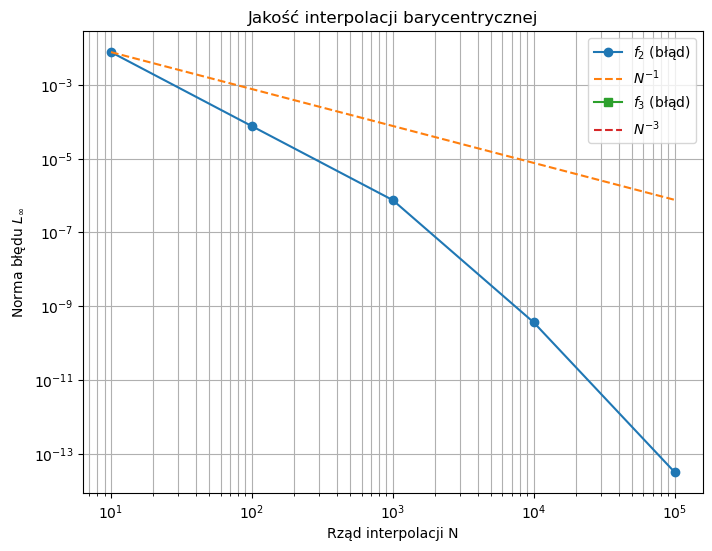

In [ ]:
# ===== Twoja implementacja tutaj =====
def f2(x):
    return np.sign(x) * x**2


def f3(x):
    return np.abs(np.sign(5*x))**3


n_values = [1, 2, 3, 4, 5]          
x_test = np.linspace(-1, 1, 1000)   
eps = np.finfo(float).eps          


def analyze_interpolation(func, v, label):
    orders = []
    errors = []

    for n in n_values:
        N = 10**n +1
        xi = chebyshev_nodes(N)
        wi = bar_cheb_weights(N)
        yi = func(xi)

        P = barycentric_inte(xi, yi, wi, x_test)
        f_exact = func(x_test)

        err = L_inf(f_exact, P)

        orders.append(10**n)
        errors.append(err)

        print(f"{label}: rząd = {10**n}, błąd = {err:.3e}")

        if err < 10 * eps:
            break

    return np.array(orders), np.array(errors)


orders_f2, errors_f2 = analyze_interpolation(f2, v=1, label="f2")
orders_f3, errors_f3 = analyze_interpolation(f3, v=3, label="f3")

plt.figure(figsize=(8, 6))

# f2
plt.loglog(orders_f2, errors_f2, 'o-', label=r'$f_2$ (błąd)')
plt.loglog(
    orders_f2,
    errors_f2[0] * (orders_f2 / orders_f2[0])**(-1),
    '--',
    label=r'$N^{-1}$'
)

# f3
plt.loglog(orders_f3, errors_f3, 's-', label=r'$f_3$ (błąd)')
plt.loglog(
    orders_f3,
    errors_f3[0] * (orders_f3 / orders_f3[0])**(-3),
    '--',
    label=r'$N^{-3}$'
)

plt.xlabel("Rząd interpolacji N")
plt.ylabel(r"Norma błędu $L_\infty$")
plt.title("Jakość interpolacji barycentrycznej")
plt.legend()
plt.grid(True, which="both")
plt.show()


---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

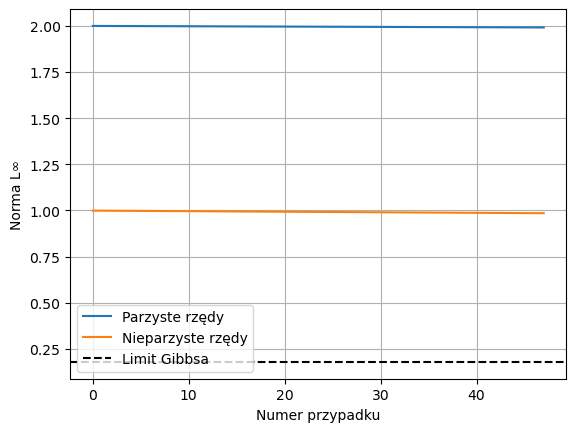

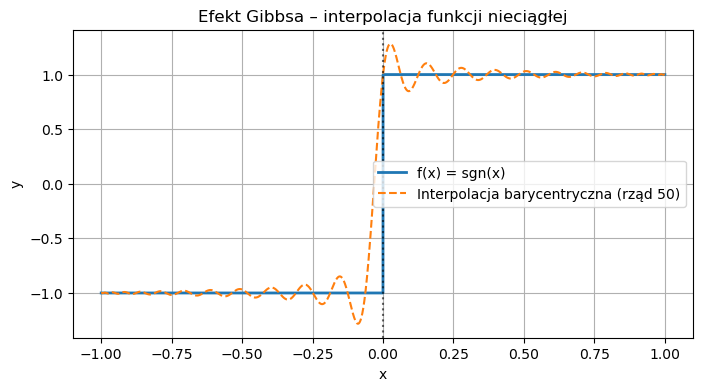

In [47]:
# ===== Twoja implementacja tutaj =====
# funkcja nieciągła
from scipy.interpolate import barycentric_interpolate
def f5(x):
    return np.sign(x)

# punkty do rysowania
x_plot = np.linspace(-1, 1, 5000)
f_exact = f5(x_plot)

# rzędy interpolacji
orders = range(5, 101, 2)  # tylko nieparzyste
errors_even = []
errors_odd = []

for n in range(5, 101):
    N = n
    nodes = N + 1

    xi = np.cos(np.pi * np.arange(nodes) / (nodes - 1))
    yi = f5(xi)

    P = barycentric_interpolate(xi, yi, x_plot)

    err = np.max(np.abs(f_exact - P))

    if N % 2 == 0:
        errors_even.append(err)
    else:
        errors_odd.append(err)

# ===== WYKRES BŁĘDU =====
plt.figure()
plt.plot(range(len(errors_even)), errors_even, label="Parzyste rzędy")
plt.plot(range(len(errors_odd)), errors_odd, label="Nieparzyste rzędy")
plt.axhline(0.18, color='k', linestyle='--', label="Limit Gibbsa")
plt.xlabel("Numer przypadku")
plt.ylabel("Norma L∞")
plt.legend()
plt.grid(True)
plt.show()

# punkty do rysowania
x_plot = np.linspace(-1, 1, 5000)
f_exact = f5(x_plot)

# rząd interpolacji (zmieniaj, np. 10, 20, 50, 100)
N = 50
nodes = N + 1

# węzły Czebyszewa
xi = np.cos(np.pi * np.arange(nodes) / (nodes - 1))
yi = f5(xi)

# interpolacja barycentryczna
P = barycentric_interpolate(xi, yi, x_plot)

# ===== WYKRES =====
plt.figure(figsize=(8, 4))
plt.plot(x_plot, f_exact, label="f(x) = sgn(x)", linewidth=2)
plt.plot(x_plot, P, '--', label=f"Interpolacja barycentryczna (rząd {N})")
plt.axvline(0, color='k', linestyle=':', alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Efekt Gibbsa – interpolacja funkcji nieciągłej")
plt.legend()
plt.grid(True)
plt.show()

Na wykresach zaobserwowano efekt Gibbsa, objawiający się występowaniem oscylacji wielomianu interpolacyjnego w pobliżu punktu nieciągłości funkcji. Pomimo zwiększania rzędu interpolacji amplituda oscylacji nie zanika, a jedynie ulega lokalizacji w coraz węższym obszarze. Norma 𝐿dąży do stałej wartości, co potwierdza teoretyczne własności efektu Gibbsa.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)